# Optimizing Random Forest Parameter
* this notebook will write methods to help me to choose the best random forest parameters to use
* By choosing the best random forest parameters, the goal is to select better features and yielding high classfication score.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
from mne.decoding import UnsupervisedSpatialFilter
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from scipy.stats import skew, kurtosis
import mne 

from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

import time
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [2]:
%run Batch_ArtifactFilter_Epoch.ipynb

In [3]:
epoch=mne.read_epochs('D:\\USB Drive\\NewEEG-200s\\New\\20131216_1310_epo.fif')

Reading D:\USB Drive\NewEEG-200s\New\20131216_1310_epo.fif ...
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
1759 matching events found
Applying baseline correction (mode: mean)
1759 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [4]:
def removebadchannel(epoch):
    epoch.drop_channels(['Lm','Rm','VEOG'])
    epoch.drop_channels(['STI 014'])

In [7]:
 removebadchannel(epoch)

ValueError: Channel(s) Lm, Rm, VEOG not found, nothing dropped.

In [8]:
newdata=epoch.get_data()
epoch.get_data().shape

(1759, 125, 257)

In [11]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 32125)


In [12]:
clf = make_pipeline(Vectorizer(),
                   StandardScaler(),
                         LogisticRegression())
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
score = clf.score(X_test, y_test)

C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [19]:
print(y.shape)

(1759,)


In [15]:
print(score)

0.04924242424242424


In [9]:
def filter_event_id(epoch):
    newepoch=epoch
    epochs=[[]]
    j=0
    for i in range(len(newepoch.events[:,-1])):
        if i % 3 ==0:
            epochs.append([])
            j=j+1
            epochs[j].append(epoch.events[i,-1])
        else:
            epochs[j].append(epoch.events[i,-1])
    for events in epochs:
        if  4 in events or 1 in events or 13 in events or 16 in events:
            for i in range(len(events)):
                    events[i]=4
        else:
            for i in range(len(events)):
                    events[i]=5
    epochs.pop(0)
    flattened_list = [y for x in epochs for y in x]
    for i in range(len(newepoch.events)):
        newepoch.events[i]=flattened_list[i]
    return newepoch

In [10]:
epoch=filter_event_id(epoch)
print(epoch.events[:,-1])

[4 4 4 ... 4 4 4]


In [21]:
clf = make_pipeline(Vectorizer(),
                   StandardScaler(),
                         LogisticRegression())
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
clf.fit(X_train, y_train)
    
score = clf.score(X_test, y_test)
print(score)

C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5587121212121212


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [24]:
y_train=y_train.values.ravel()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [29]:
fit_rf = RandomForestClassifier(random_state=42)

In [30]:
tart = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n',
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

KeyboardInterrupt: 

In [31]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.5681818181818182


In [32]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape

In [33]:
channel1.shape

(125,)

In [34]:
import pandas as pd
feature_imp = pd.Series(channel1,index=epoch.ch_names).sort_values(ascending=False)
feature_imp

LB3     0.043873
R2      0.037277
L12     0.032011
RR11    0.022675
LC4     0.021706
LC1     0.021035
L1      0.019069
LD4     0.018732
LD3     0.018160
RE4     0.017757
R3      0.017260
L14     0.016231
RR1     0.016154
LC3     0.014293
R1      0.014113
LL1     0.013937
RR2     0.013547
LC5     0.013312
RD3     0.013069
LD5     0.013060
LL7     0.013005
RC7     0.012018
Z10     0.011981
LL2     0.011185
Z12     0.011028
RR13    0.010987
RB4     0.010559
Z14     0.010452
Z13     0.010236
LL6     0.010195
          ...   
Z9      0.003790
RR7     0.003675
Z8      0.003618
R9      0.003460
Z3      0.003403
Z4      0.003346
L10     0.003198
LA2     0.003184
L6      0.003122
LB5     0.002957
L3      0.002745
LA5     0.002649
RR5     0.002273
R5      0.002235
LL9     0.002212
RC5     0.001910
LL4     0.001738
RB1     0.001730
LA4     0.001712
RC4     0.001439
RA4     0.001407
L4      0.001308
RD1     0.000900
RR8     0.000865
RA2     0.000690
LA1     0.000600
RE1     0.000553
LD1     0.0004

In [36]:
epoch.drop_channels(['LL8'])

ValueError: Channel(s) LL8 not found, nothing dropped.

In [38]:
epoch.drop_channels(['RR3','LD1','RE1','LA1','RA2'])

ValueError: Channel(s) RR3, LD1, RE1, LA1, RA2 not found, nothing dropped.

In [39]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 30583)


In [40]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.5522727272727272


In [42]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape

In [43]:
channel1.shape

(119,)

In [44]:
import pandas as pd
feature_imp = pd.Series(channel1,index=epoch.ch_names).sort_values(ascending=False)
feature_imp

LB3     0.043552
R2      0.040238
L12     0.034307
LC1     0.023489
RR11    0.023316
LD4     0.021898
LC4     0.018237
RE4     0.017575
L1      0.017559
LD5     0.017054
L14     0.016276
LC3     0.016222
R3      0.015531
R1      0.015054
RR1     0.014495
LD3     0.014256
RR13    0.014108
RR2     0.013079
RD3     0.013078
LL1     0.012721
Z10     0.011791
LC6     0.011551
RC7     0.011535
Z14     0.011348
LL6     0.010739
RD7     0.010282
RD4     0.010237
LL2     0.010056
LL13    0.009880
Z12     0.009648
          ...   
LE3     0.004498
R13     0.004327
Z4      0.004189
LE4     0.004076
RR10    0.004072
LL12    0.004017
RR4     0.003995
LB2     0.003915
R9      0.003818
Z8      0.003751
RC5     0.003638
LL4     0.003462
LE1     0.003434
LA4     0.003182
RR7     0.003134
RB1     0.003040
Z3      0.002979
LA2     0.002879
L11     0.002465
R5      0.002391
RC4     0.001782
RD1     0.001738
Z9      0.001713
L6      0.001661
RA4     0.001590
RR5     0.001572
LB5     0.001140
LL9     0.0010

In [45]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2',
                  max_depth = 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
print("Best Parameters using grid search:{'max_features': 'log2', 'max_depth': 3, 'bootstrap': True, 'criterion': 'gini'}")

Best Parameters using grid search:{'max_features': 'log2', 'max_depth': 3, 'bootstrap': True, 'criterion': 'gini'}


In [49]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.5522727272727272


In [51]:
epoch.drop_channels(['L4','RR8','LL9'])

ValueError: Channel(s) L4, RR8, LL9 not found, nothing dropped.

In [52]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 29812)


In [56]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.5454545454545454


In [59]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape
channel1.shape

(116,)

In [60]:
import pandas as pd
feature_imp = pd.Series(channel1,index=epoch.ch_names).sort_values(ascending=False)
feature_imp

LB3     0.039584
R2      0.038039
L12     0.031218
LC4     0.025792
LC1     0.025363
LD4     0.021945
RR11    0.020689
L14     0.018502
L1      0.017859
RE4     0.017310
R1      0.016979
RR1     0.016683
RC7     0.015317
R3      0.015019
LC3     0.014143
LL7     0.013869
LD5     0.013827
LL1     0.013656
LD3     0.013603
RD3     0.013054
Z12     0.013008
Z13     0.012450
RR2     0.011206
LL13    0.011202
L2      0.010593
Z10     0.010557
Z14     0.010539
LC6     0.010503
RR12    0.010120
RB4     0.009980
          ...   
L10     0.004240
LE4     0.003992
RR9     0.003970
RR4     0.003907
LA2     0.003893
LC2     0.003877
RA4     0.003856
L6      0.003854
RB1     0.003615
LL12    0.003537
LA5     0.003477
RA3     0.003217
L13     0.003159
L9      0.003151
Z9      0.003100
RR10    0.002966
Z4      0.002916
RB5     0.002793
Z3      0.002723
LB5     0.002392
RC4     0.002364
LA4     0.002105
L11     0.001964
RR5     0.001888
Z8      0.001801
RC5     0.000881
R9      0.000879
RD1     0.0006

In [61]:
epoch.pick_channels(['LB3','R2','L12','LC4','LC1','LD4','RR11','L14','L1','RE4'])

<EpochsFIF  |   1759 events (all good), 0 - 0.5 sec, baseline [0, 0], ~34.6 MB, data loaded,
 'b-f1-pic': 0
 'b-f1-snd': 0
 'b-f1-spk': 948
 'b-f1-wrd': 0
 'b-f2-pic': 0
 'b-f2-snd': 0
 'b-f2-spk': 811
 'b-f2-wrd': 0
 'b-tg-pic': 0
 'b-tg-snd': 0
 'b-tg-spk': 0
 'b-tg-wrd': 0
 'f-f1-pic': 0
 'f-f1-snd': 0
 'f-f1-spk': 0
 'f-f1-wrd': 0
 'f-f2-pic': 0
 'f-f2-snd': 0
 'f-f2-spk': 0
 'f-f2-wrd': 0
 'f-tg-pic': 0
 'f-tg-snd': 0
 'f-tg-spk': 0
 'f-tg-wrd': 0>

In [62]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 2570)


In [63]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.5772727272727273


In [64]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape
channel1.shape

(10,)

In [65]:
import pandas as pd
feature_imp = pd.Series(channel1,index=epoch.ch_names).sort_values(ascending=False)
feature_imp

R2      0.143462
L14     0.137996
LC1     0.116492
LB3     0.111124
LC4     0.107210
RE4     0.087846
L1      0.081201
L12     0.078963
RR11    0.069034
LD4     0.066672
dtype: float64

In [77]:
epoch=mne.read_epochs('D:\\USB Drive\\NewEEG-200s\\New\\20131216_1310_epo.fif')

Reading D:\USB Drive\NewEEG-200s\New\20131216_1310_epo.fif ...
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
1759 matching events found
Applying baseline correction (mode: mean)
1759 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [78]:
epoch.pick_channels(['LB3','R2','L12','LC4','LC1','LD4','RR11','L14','L1','RE4','R1','RR1','RC7','R3','LC3','LL7','LD5','LL1','LD3','RD3','Z12','Z13','RR2','LL13' ,'L2','Z10' ,'Z14' ,'LC6','RR12','RB4' ])

<EpochsFIF  |   1759 events (all good), 0 - 0.5 sec, baseline [0, 0], ~103.6 MB, data loaded,
 'b-f1-pic': 57
 'b-f1-snd': 118
 'b-f1-spk': 96
 'b-f1-wrd': 59
 'b-f2-pic': 57
 'b-f2-snd': 118
 'b-f2-spk': 96
 'b-f2-wrd': 59
 'b-tg-pic': 97
 'b-tg-snd': 96
 'b-tg-spk': 78
 'b-tg-wrd': 59
 'f-f1-pic': 84
 'f-f1-snd': 57
 'f-f1-spk': 35
 'f-f1-wrd': 80
 'f-f2-pic': 84
 'f-f2-snd': 57
 'f-f2-spk': 35
 'f-f2-wrd': 81
 'f-tg-pic': 91
 'f-tg-snd': 56
 'f-tg-spk': 58
 'f-tg-wrd': 51>

In [79]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 7710)


In [80]:
y

array([14, 18, 13, ..., 17, 24, 16])

In [81]:
epoch=filter_event_id(epoch)
print(epoch.events[:,-1])

[4 4 4 ... 4 4 4]


In [82]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 7710)


In [83]:
y

array([4, 4, 4, ..., 4, 4, 4])

In [85]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.5568181818181818


In [86]:
epoch=mne.read_epochs('D:\\USB Drive\\NewEEG-200s\\New\\20131216_1310_epo.fif')

Reading D:\USB Drive\NewEEG-200s\New\20131216_1310_epo.fif ...
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
1759 matching events found
Applying baseline correction (mode: mean)
1759 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [87]:
epoch.pick_channels(['LB3','R2','L12','LC4','LC1','LD4','RR11','L14','L1','RE4','R1','RR1','RC7','R3','LC3'])

<EpochsFIF  |   1759 events (all good), 0 - 0.5 sec, baseline [0, 0], ~51.8 MB, data loaded,
 'b-f1-pic': 57
 'b-f1-snd': 118
 'b-f1-spk': 96
 'b-f1-wrd': 59
 'b-f2-pic': 57
 'b-f2-snd': 118
 'b-f2-spk': 96
 'b-f2-wrd': 59
 'b-tg-pic': 97
 'b-tg-snd': 96
 'b-tg-spk': 78
 'b-tg-wrd': 59
 'f-f1-pic': 84
 'f-f1-snd': 57
 'f-f1-spk': 35
 'f-f1-wrd': 80
 'f-f2-pic': 84
 'f-f2-snd': 57
 'f-f2-spk': 35
 'f-f2-wrd': 81
 'f-tg-pic': 91
 'f-tg-snd': 56
 'f-tg-spk': 58
 'f-tg-wrd': 51>

In [88]:
epoch=filter_event_id(epoch)
print(epoch.events[:,-1])

[4 4 4 ... 4 4 4]


In [89]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 3855)


In [92]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =100, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.6522727272727272


In [44]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 10
max_estimators = 400

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

ValueError: n_estimators=10 must be larger or equal to len(estimators_)=400 when warm_start==True

In [115]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2',
                  max_depth = 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=True)

In [102]:
from sklearn import metrics
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
fit_rf.fit(X_train, y_train)
    
y_pred=fit_rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.625


In [116]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 15
max_estimators = 400

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

ValueError: n_estimators=15 must be larger or equal to len(estimators_)=100 when warm_start==True

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

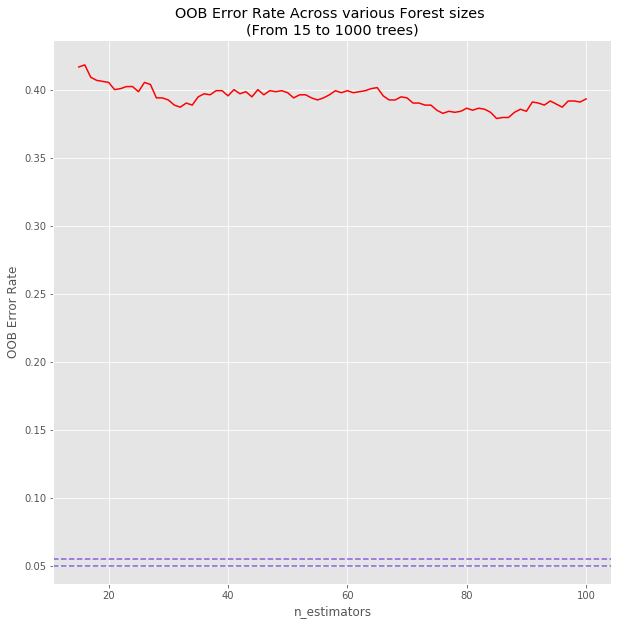

In [106]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))


oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055,
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05,
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [117]:
fit_rf = RandomForestClassifier(random_state=42)

In [118]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2',
                  max_depth = 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [120]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 3855)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [122]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 15
max_estimators = 400

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarnin

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

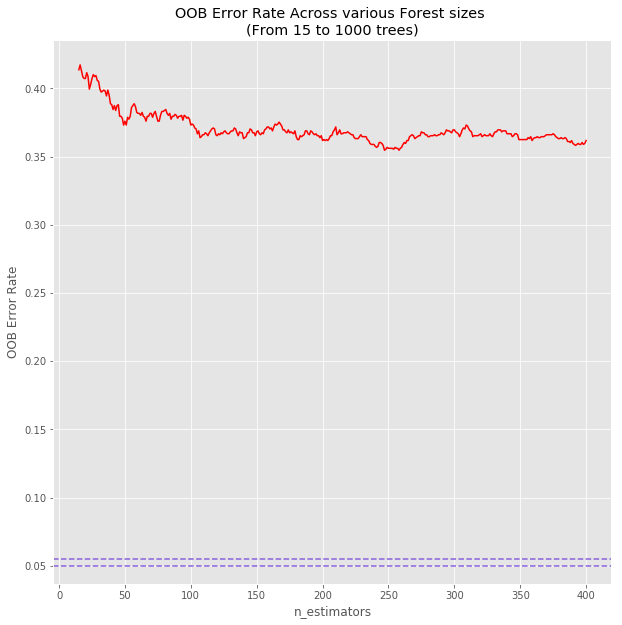

In [123]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))


oob_series.plot(kind='line',
                color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [11]:
epoch.pick_channels(['LB3','R2','L12','LC4','LC1','LD4','RR11','L14','L1','RE4','R1','RR1','RC7','R3','LC3'])

<EpochsFIF  |   1759 events (all good), 0 - 0.5 sec, baseline [0, 0], ~51.8 MB, data loaded,
 'b-f1-pic': 0
 'b-f1-snd': 0
 'b-f1-spk': 948
 'b-f1-wrd': 0
 'b-f2-pic': 0
 'b-f2-snd': 0
 'b-f2-spk': 811
 'b-f2-wrd': 0
 'b-tg-pic': 0
 'b-tg-snd': 0
 'b-tg-spk': 0
 'b-tg-wrd': 0
 'f-f1-pic': 0
 'f-f1-snd': 0
 'f-f1-spk': 0
 'f-f1-wrd': 0
 'f-f2-pic': 0
 'f-f2-snd': 0
 'f-f2-spk': 0
 'f-f2-wrd': 0
 'f-tg-pic': 0
 'f-tg-snd': 0
 'f-tg-spk': 0
 'f-tg-wrd': 0>

In [12]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1759, 3855)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [16]:
X_train.shape
X_test.shape

(352, 3855)

In [17]:
fit_rf = RandomForestClassifier(random_state=42)
fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2',
                  max_depth = 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 10
max_estimators = 400

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\kingsly\Anaconda3\envs\mne\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarnin

In [20]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))


oob_series.plot(kind='line',
                color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 10 to 400 trees)')

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 10 to 400 trees)')

In [21]:
epoch=mne.read_epochs('D:\\USB Drive\\NewEEG-200s\\New\\20131216_1441_epo.fif')

Reading D:\USB Drive\NewEEG-200s\New\20131216_1441_epo.fif ...
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
1753 matching events found
Applying baseline correction (mode: mean)
1753 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [22]:
def removebadchannel(epoch):
    epoch.drop_channels(['Lm','Rm','VEOG'])
    epoch.drop_channels(['STI 014'])
removebadchannel

<function __main__.removebadchannel(epoch)>

In [23]:
epoch=filter_event_id(epoch)
print(epoch.events[:,-1])

[5 5 5 ... 4 4 4]


In [24]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1753, 33153)


In [25]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.8205128205128205


In [26]:
score = clf.score(X_test, y_test)
print(score)

0.4584473684210527


In [28]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape
channel1.shape

(129,)

In [31]:
removebadchannel(epoch)

ValueError: Channel(s) Lm, Rm, VEOG not found, nothing dropped.

In [30]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1753, 32125)


In [35]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.5726495726495726


In [37]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1753, 32125)


In [38]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape
channel1.shape

(125,)

In [39]:
import pandas as pd
feature_imp = pd.Series(channel1,index=epoch.ch_names).sort_values(ascending=False)
feature_imp

LE3       0.027760
R1        0.025667
LC2       0.017781
L7        0.017356
LB6       0.016791
RD5       0.015712
LB3       0.015485
Z6        0.015206
RR12      0.014606
RR1       0.014493
LD6       0.014194
LA2       0.014158
RC4       0.013864
RD6       0.013849
LL11      0.013672
Z9        0.013506
RB5       0.013420
LA4       0.013394
L14       0.013324
Z8        0.012805
RR2       0.012753
L11       0.012686
LB1       0.012003
LB5       0.011841
LA5       0.011699
RR6       0.011542
R12       0.011488
LA1       0.011358
Z14       0.011087
RR9       0.011023
            ...   
L9        0.004098
Z2        0.004098
RA5       0.004001
Z1        0.003875
LL12      0.003866
RD3       0.003799
LD5       0.003767
R14       0.003724
Z4        0.003670
R4        0.003587
L13       0.003536
R2        0.003512
R11       0.003368
R10       0.003068
RB3       0.003051
Nasium    0.002995
RD7       0.002989
RB2       0.002813
LC3       0.002675
Z5        0.002658
RC2       0.002543
RC7       0.

In [40]:
epoch.pick_channels(['LB3','R2','L12','LC4','LC1','LD4','RR11','L14','L1','RE4','R1','RR1','RC7','R3','LC3'])

<EpochsFIF  |   1753 events (all good), 0 - 0.5 sec, baseline [0, 0], ~51.7 MB, data loaded,
 'b-f1-pic': 0
 'b-f1-snd': 0
 'b-f1-spk': 918
 'b-f1-wrd': 0
 'b-f2-pic': 0
 'b-f2-snd': 0
 'b-f2-spk': 835
 'b-f2-wrd': 0
 'b-tg-pic': 0
 'b-tg-snd': 0
 'b-tg-spk': 0
 'b-tg-wrd': 0
 'f-f1-pic': 0
 'f-f1-snd': 0
 'f-f1-spk': 0
 'f-f1-wrd': 0
 'f-f2-pic': 0
 'f-f2-snd': 0
 'f-f2-spk': 0
 'f-f2-wrd': 0
 'f-tg-pic': 0
 'f-tg-snd': 0
 'f-tg-spk': 0
 'f-tg-wrd': 0>

In [41]:
X = epoch.get_data()
y = epoch.events[:,-1]
vec=Vectorizer()
X=vec.fit_transform(X)
print(X.shape)

(1753, 3855)


In [42]:
from sklearn import metrics
clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.5327635327635327


In [43]:
score = clf.score(X_test, y_test)
print(score)

-0.0792280701754382
